In [1]:
%run -i startup2.py

In [2]:
# use the billinge group plot style
use_bg_mpl_style()

# Analyze the fitting results from the `analysis3.ipynb`

## The quality of the fits

In [20]:
fits = xr.load_dataset("summary/fits.nc")
fits = fits.sortby(["temperature", "time", "ligand"])
fits

<xarray.Dataset>
Dimensions:        (dim_0: 5, x: 4841, xobs: 10001)
Coordinates:
  * x              (x) float64 1.6 1.61 1.62 1.63 ... 49.97 49.98 49.99 50.0
  * xobs           (xobs) float64 0.0 0.01 0.02 0.03 ... 99.97 99.98 99.99 100.0
Dimensions without coordinates: dim_0
Data variables:
    y              (dim_0, x) float64 -0.6139 -0.6097 ... 0.001426 0.001998
    ycalc          (dim_0, x) float64 -0.5089 -0.4934 ... -0.0009545 -0.001129
    yobs           (dim_0, xobs) float64 0.0 -0.00372 ... 0.00147 0.001737
    samples        (dim_0) object 'JBNP32_fits' ... 'JBNP33L_fits'
    Sample         (dim_0) object 'JBNP32' 'JBNP32L' 'JBNP31' 'JBNP33' 'JBNP33L'
    Ti             (dim_0) int64 5 5 5 5 5
    Glycolic acid  (dim_0) float64 0.38 0.38 0.57 0.57 0.57
    H2SO4          (dim_0) float64 0.79 0.79 0.622 0.622 0.622
    H2O            (dim_0) int64 20 20 20 20 20
    temperature    (dim_0) int64 130 130 160 160 160
    time           (dim_0) int64 5 5 30 30 30
    ligand         (dim_0) int64 0 1 0 0 1
    diameter       (dim_0) int64 30 30 55 75 75

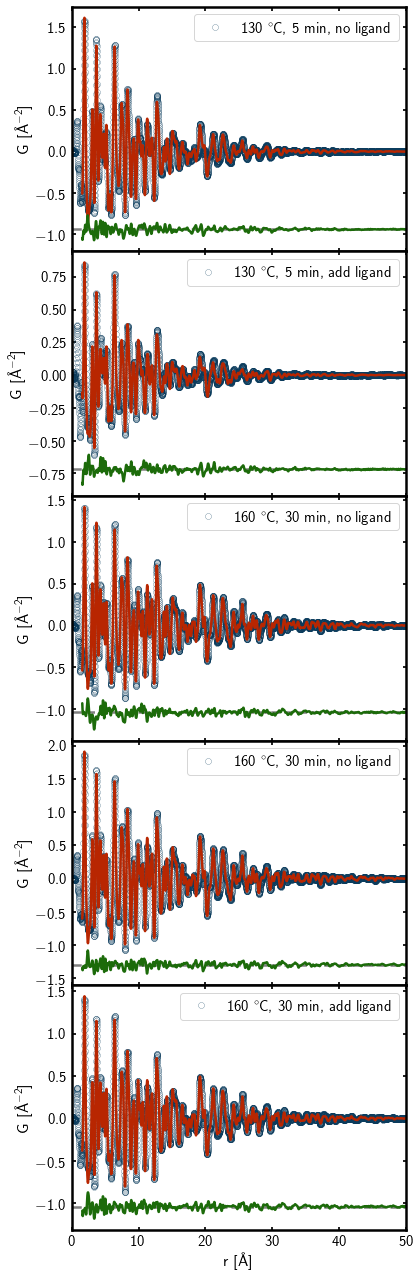

In [19]:
axes = md.plot_fits_along_dim(fits, dim="dim_0", num_row=5, grid_config={"hspace": 0}, figure_config={"figsize": (4 * 1.5, 3 * 5 * 1.5)})

def edit_axes():
    n = len(axes)
    for i in range(n - 1):
        ax = axes[i]
        ax.set_xticklabels([])
        ax.set_xlabel("")
    for i in range(n):
        ax = axes[i]
        f = fits.isel(dim_0=i)
        T = "{} $^\circ$C".format(f["temperature"].item())
        t = "{} min".format(f["time"].item())
        l = "add ligand" if f["ligand"].item() else "no ligand"
        legend = "{}, {}, {}".format(T, t, l)
        ax.legend([legend])
        
edit_axes()

## Analyze the parameters of structures

In [3]:
params = xr.load_dataset("summary/parameters.nc")
params = process_param(params)
params = params.sortby(["temperature", "time", "ligand"])
params

<xarray.Dataset>
Dimensions:        (dim_0: 5)
Dimensions without coordinates: dim_0
Data variables:
    B_psize        (dim_0) float64 17.14 15.01 31.9 26.8 31.86
    B_psig         (dim_0) float64 8.231 7.782 11.71 11.81 11.46
    A_psize        (dim_0) float64 53.06 22.69 63.05 61.07 59.27
    amplitube      (dim_0) float64 0.0 0.09434 0.0 0.0 0.07181
    sigma          (dim_0) float64 10.0 6.788 10.0 10.0 7.401
    phi            (dim_0) float64 0.0 -2.401 0.0 0.0 -1.582
    wavelength     (dim_0) float64 5.0 4.102 5.0 5.0 4.409
    A_scale        (dim_0) float64 0.02154 0.03436 0.03492 0.05097 0.03829
    A_delta2       (dim_0) float64 3.401 11.73 3.717 3.476 3.698
    A_a            (dim_0) float64 3.784 3.943 3.786 3.785 3.785
    A_c            (dim_0) float64 9.525 9.256 9.5 9.501 9.505
    A_Ti1_Biso     (dim_0) float64 0.725 3.385 0.4833 0.4941 0.4858
    A_O1_Biso      (dim_0) float64 1.63 0.5769 1.127 1.301 1.269
    A_O1_z         (dim_0) float64 0.2128 0.233 0.2117 0.2129 0.2143
    B_scale        (dim_0) float64 0.5228 0.2974 0.372 0.5073 0.385
    B_delta2       (dim_0) float64 1.905 2.096 2.67 1.607 1.555
    B_a            (dim_0) float64 12.19 12.2 12.18 12.19 12.18
    B_b            (dim_0) float64 3.747 3.756 3.75 3.747 3.75
    B_c            (dim_0) float64 6.493 6.472 6.491 6.502 6.493
    B_beta         (dim_0) float64 1.867 1.868 1.867 1.868 1.867
    B_Ti0_Biso     (dim_0) float64 0.534 0.5623 0.4902 0.4872 0.4722
    B_Ti1_Biso     (dim_0) float64 0.61 0.6745 0.4811 0.4681 0.4868
    B_O2_Biso      (dim_0) float64 1.037 0.6843 1.248 1.074 1.054
    B_O3_Biso      (dim_0) float64 2.499 2.86 1.697 1.898 2.018
    B_O4_Biso      (dim_0) float64 1.025 0.9235 1.205 1.09 1.101
    B_O5_Biso      (dim_0) float64 2.196 2.65 1.52 1.77 1.956
    B_Ti0_x        (dim_0) float64 0.1003 0.1003 0.1013 0.101 0.101
    B_Ti0_z        (dim_0) float64 0.7062 0.7051 0.7068 0.707 0.7065
    B_Ti1_x        (dim_0) float64 0.1967 0.198 0.1962 0.1961 0.1965
    B_Ti1_z        (dim_0) float64 0.2878 0.2917 0.2864 0.2863 0.287
    B_O2_x         (dim_0) float64 0.05997 0.06123 0.06111 0.0594 0.05997
    B_O2_z         (dim_0) float64 0.3661 0.3663 0.3619 0.363 0.3633
    B_O3_x         (dim_0) float64 0.1365 0.1394 0.1336 0.1353 0.1342
    B_O3_z         (dim_0) float64 0.02035 0.03829 0.01184 0.01169 0.01483
    B_O4_x         (dim_0) float64 0.1332 0.1376 0.1324 0.1335 0.1341
    B_O4_z         (dim_0) float64 0.7113 0.7157 0.7106 0.711 0.7141
    B_O5_x         (dim_0) float64 0.2313 0.2222 0.2415 0.2358 0.235
    B_O5_z         (dim_0) float64 0.3406 0.3218 0.3554 0.3504 0.3501
    rw             (dim_0) float64 0.1177 0.1444 0.1328 0.1074 0.12
    samples        (dim_0) object 'JBNP32_result' ... 'JBNP33L_result'
    Sample         (dim_0) object 'JBNP32' 'JBNP32L' 'JBNP31' 'JBNP33' 'JBNP33L'
    Ti             (dim_0) int64 5 5 5 5 5
    Glycolic acid  (dim_0) float64 0.38 0.38 0.57 0.57 0.57
    H2SO4          (dim_0) float64 0.79 0.79 0.622 0.622 0.622
    H2O            (dim_0) int64 20 20 20 20 20
    temperature    (dim_0) int64 130 130 160 190 190
    time           (dim_0) int64 5 5 30 5 5
    ligand         (dim_0) int64 0 1 0 0 1
    diameter       (dim_0) int64 30 30 55 75 75
    B_fraction     (dim_0) float64 96.04 89.64 91.42 90.87 90.95
    A_fraction     (dim_0) float64 3.956 10.36 8.584 9.131 9.045

In [4]:
# remove the outlier
params2 = params.isel({"dim_0": [0, 2, 3, 4]})
params2

<xarray.Dataset>
Dimensions:        (dim_0: 4)
Dimensions without coordinates: dim_0
Data variables:
    B_psize        (dim_0) float64 17.14 31.9 26.8 31.86
    B_psig         (dim_0) float64 8.231 11.71 11.81 11.46
    A_psize        (dim_0) float64 53.06 63.05 61.07 59.27
    amplitube      (dim_0) float64 0.0 0.0 0.0 0.07181
    sigma          (dim_0) float64 10.0 10.0 10.0 7.401
    phi            (dim_0) float64 0.0 0.0 0.0 -1.582
    wavelength     (dim_0) float64 5.0 5.0 5.0 4.409
    A_scale        (dim_0) float64 0.02154 0.03492 0.05097 0.03829
    A_delta2       (dim_0) float64 3.401 3.717 3.476 3.698
    A_a            (dim_0) float64 3.784 3.786 3.785 3.785
    A_c            (dim_0) float64 9.525 9.5 9.501 9.505
    A_Ti1_Biso     (dim_0) float64 0.725 0.4833 0.4941 0.4858
    A_O1_Biso      (dim_0) float64 1.63 1.127 1.301 1.269
    A_O1_z         (dim_0) float64 0.2128 0.2117 0.2129 0.2143
    B_scale        (dim_0) float64 0.5228 0.372 0.5073 0.385
    B_delta2       (dim_0) float64 1.905 2.67 1.607 1.555
    B_a            (dim_0) float64 12.19 12.18 12.19 12.18
    B_b            (dim_0) float64 3.747 3.75 3.747 3.75
    B_c            (dim_0) float64 6.493 6.491 6.502 6.493
    B_beta         (dim_0) float64 1.867 1.867 1.868 1.867
    B_Ti0_Biso     (dim_0) float64 0.534 0.4902 0.4872 0.4722
    B_Ti1_Biso     (dim_0) float64 0.61 0.4811 0.4681 0.4868
    B_O2_Biso      (dim_0) float64 1.037 1.248 1.074 1.054
    B_O3_Biso      (dim_0) float64 2.499 1.697 1.898 2.018
    B_O4_Biso      (dim_0) float64 1.025 1.205 1.09 1.101
    B_O5_Biso      (dim_0) float64 2.196 1.52 1.77 1.956
    B_Ti0_x        (dim_0) float64 0.1003 0.1013 0.101 0.101
    B_Ti0_z        (dim_0) float64 0.7062 0.7068 0.707 0.7065
    B_Ti1_x        (dim_0) float64 0.1967 0.1962 0.1961 0.1965
    B_Ti1_z        (dim_0) float64 0.2878 0.2864 0.2863 0.287
    B_O2_x         (dim_0) float64 0.05997 0.06111 0.0594 0.05997
    B_O2_z         (dim_0) float64 0.3661 0.3619 0.363 0.3633
    B_O3_x         (dim_0) float64 0.1365 0.1336 0.1353 0.1342
    B_O3_z         (dim_0) float64 0.02035 0.01184 0.01169 0.01483
    B_O4_x         (dim_0) float64 0.1332 0.1324 0.1335 0.1341
    B_O4_z         (dim_0) float64 0.7113 0.7106 0.711 0.7141
    B_O5_x         (dim_0) float64 0.2313 0.2415 0.2358 0.235
    B_O5_z         (dim_0) float64 0.3406 0.3554 0.3504 0.3501
    rw             (dim_0) float64 0.1177 0.1328 0.1074 0.12
    samples        (dim_0) object 'JBNP32_result' ... 'JBNP33L_result'
    Sample         (dim_0) object 'JBNP32' 'JBNP31' 'JBNP33' 'JBNP33L'
    Ti             (dim_0) int64 5 5 5 5
    Glycolic acid  (dim_0) float64 0.38 0.57 0.57 0.57
    H2SO4          (dim_0) float64 0.79 0.622 0.622 0.622
    H2O            (dim_0) int64 20 20 20 20
    temperature    (dim_0) int64 130 160 190 190
    time           (dim_0) int64 5 30 5 5
    ligand         (dim_0) int64 0 0 0 1
    diameter       (dim_0) int64 30 55 75 75
    B_fraction     (dim_0) float64 96.04 91.42 90.87 90.95
    A_fraction     (dim_0) float64 3.956 8.584 9.131 9.045

## The $R_w$ compared with the results before

It seems that the quality of the fits is not as good as before and the parameters trend is not expected. Redo the fitting in the analysis5.ipynb.

In [8]:
def compare_Rw():
    sr = params.set_index({"dim_0": "Sample"})["rw"].to_series()
    res = pd.read_csv("result.csv", index_col=0)
    sr2 = res.T["Rw"]
    return pd.concat([sr, sr2], axis=1)

In [9]:
compare_Rw()

,rw,Rw
JBNP32,0.117687,0.116418
JBNP32L,0.144406,0.167404
JBNP31,0.132834,0.118445
JBNP33,0.107405,0.106460
JBNP33L,0.120015,0.112239


### The proportion of bronze phase

The proportion of the Bronze phase is correlated with the temperature if we think the sample 1 is an outlier.

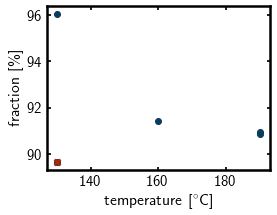

In [148]:
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(4, 3))
params.plot.scatter("temperature", "B_fraction", ax=ax)
params.isel({"dim_0": 1}).plot.scatter("temperature", "B_fraction", marker="x", ax=ax)
plt.show()

If the outlier is removed, then the fraction of Bronze synthesized at 130 C has 5% more bronze phase inside.

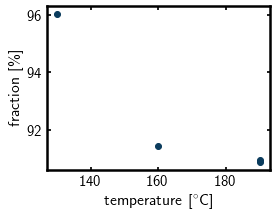

In [132]:
plt.figure(figsize=(4, 3))
params.isel({"dim_0": [0, 2, 3, 4]}).plot.scatter("temperature", "B_fraction")
plt.show()

### The lattice of bronze phase

The sample 1 is an outlier in structure parameters.

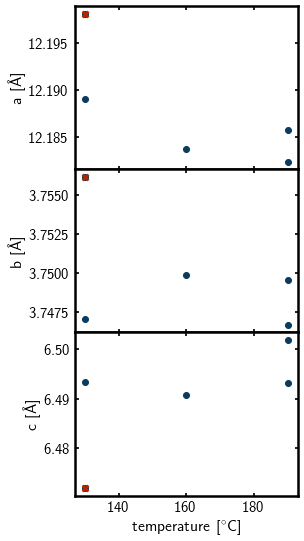

In [68]:
fig, axes = plt.subplots(3, 1, sharex=True, gridspec_kw={"hspace": 0})
fig.set_size_inches(1 * 4, 3 * 3)
params.plot.scatter("temperature", "B_a", ax=axes[0])
params.isel({"dim_0": 1}).plot.scatter("temperature", "B_a", marker="x", ax=axes[0])
params.plot.scatter("temperature", "B_b", ax=axes[1])
params.isel({"dim_0": 1}).plot.scatter("temperature", "B_b", marker="x", ax=axes[1])
params.plot.scatter("temperature", "B_c", ax=axes[2])
params.isel({"dim_0": 1}).plot.scatter("temperature", "B_c", marker="x", ax=axes[2])
plt.show()

Remove the outlier. The difference in lattice constants is smaller than 0.010 A

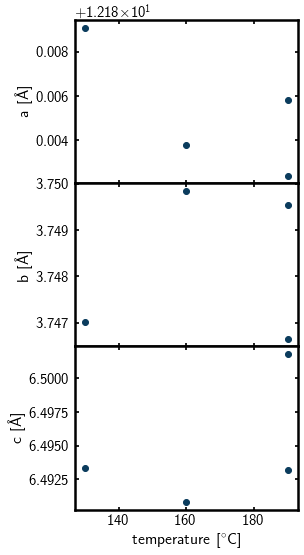

In [83]:
fig, axes = plt.subplots(3, 1, sharex=True, gridspec_kw={"hspace": 0})
fig.set_size_inches(1 * 4, 3 * 3)
keys = ["B_a", "B_b", "B_c"]
n = len(axes)
for i in range(n):
    params2.plot.scatter("temperature", keys[i], ax=axes[i])
for i in range(n-1):
    axes[i].set_xlabel("")
plt.show()

### Particle size of the nanoparticles

The one synthesized at 130 C also has a much smaller particle size.

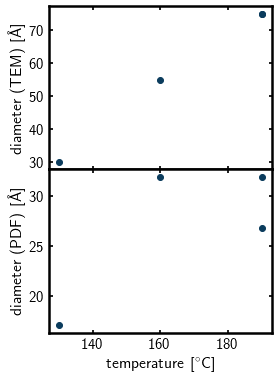

In [146]:
keys = ["diameter", "B_psize"]
n = len(keys)
fig, axes = plt.subplots(n, 1, sharex=True, figsize=(4, 3 * n), gridspec_kw={"hspace": 0})
for i in range(n):
    params2.plot.scatter("temperature", keys[i], ax=axes[i])
plt.show()

### The disorder in the structure

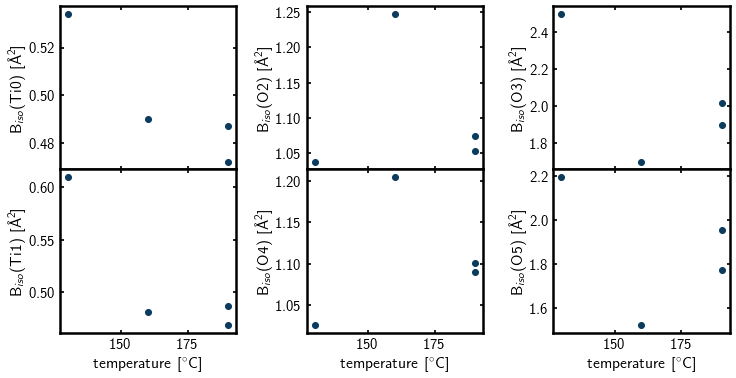

In [113]:
fig, axes = plt.subplots(2, 3, sharex=True, gridspec_kw={"hspace": 0, "wspace": 0.4})
fig.set_size_inches(3 * 4, 2 * 3)
axes = axes.T.flatten()
keys = ["B_Ti0_Biso", "B_Ti1_Biso", "B_O2_Biso", "B_O4_Biso", "B_O3_Biso", "B_O5_Biso"]
n = len(axes)
for i in range(n):
    params2.plot.scatter("temperature", keys[i], ax=axes[i])
plt.show()